## Notes

• All of the following calculations are conditional on race/ethnicity. That is, the calculation described below is carried out separately for each race.

• The figures/tables containing the data can be found here:
https://www.federalreserve.gov/boarddocs/rptcongress/creditscore/figures.htm.

• We will be analyzing
- "Figure_7.A._TransRisk_Score_Cumulative_Percentage_of_Goods_and_Bads,_by_Demographic_Group(Random-Account_Performance)_-_Race_or_ethnicity_(SSA_data)"
- "Figure 3.A. TransRisk Score: Cumulative Percentage, by Demographic Group (SSA data)" 

## Calculations

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
totalData = pd.read_csv("Figure7A.csv")
CumulativeData = pd.read_csv("Figure3A.csv")

In [2]:
%matplotlib inline

### Step 1) Calculating π
Notes: Will be calculating pi for inequality data (cumulative probabilities) and the non-cumulative data, then finding the best value for pi by comparing the means and the pi value at a score of 50 (half way point)

*** If I calculate pi with the inequality data: ***

In [3]:
# Get the dataframe that holds the cumulative percentage, by demographic group
def getPD(data, col, raceName):
    pd = data["Score"].to_frame(name="Score")
    race = np.full(len(data), raceName)
    pd["Demographic"] = race
    pd["Percentage"] = data[col]
    return pd

whites = getPD(CumulativeData, "White", "white")
blacks = getPD(CumulativeData, "Black", "black")
asians = getPD(CumulativeData, "Asian", "asian")
hispanics = getPD(CumulativeData, "Hispanic", "hispanic")
pds = [whites, blacks, asians, hispanics]
cumulative = pd.concat(pds)

In [4]:
def getPis(dataset, raceSet, goodName, badName):
    good = dataset.set_index("Score")[goodName]
    bad = dataset.set_index("Score")[badName]
    total = raceSet.set_index("Score").Percentage
    return ((total - bad) / (good - bad)).fillna(value=0)

In [5]:
asianPi = getPis(totalData, asians, "Asian (Good)", "Asian (Bad)")
whitePi = getPis(totalData, whites, "White (Good)", "White (Bad)")
blackPi = getPis(totalData, blacks, "Black (Good)", "Black (Bad)")
hispanicPi = getPis(totalData, hispanics, "Hispanic (Good)", "Hispanic (Bad)")

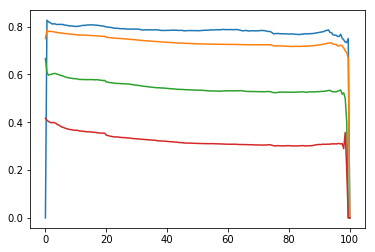

In [6]:
#pi with inequality values
plt.plot(asianPi)
plt.plot(whitePi)
plt.plot(hispanicPi)
plt.plot(blackPi)

In [7]:
#pi for each demographic if I choose the mean value with inequalites
asianPi.mean(), whitePi.mean(), hispanicPi.mean(), blackPi.mean()

(0.7778627963889763,
 0.7331253694683577,
 0.5407805362887502,
 0.32228162064873733)

In [8]:
#pi for each demographic if I choose the value at score 50 with inequalities
asianPi[50], whitePi[50], hispanicPi[50], blackPi[50]

(0.78271983640081788,
 0.72788697788697787,
 0.53443983402489637,
 0.31168177240684786)

*** If I calculate pi with the non-cumulative data ***

In [9]:
def getPisNonCumulative(dataset, raceSet, goodName, badName):
    good = dataset.set_index("Score")[goodName].diff().fillna(value=0)
    bad = dataset.set_index("Score")[badName].diff().fillna(value=0)
    total = raceSet.set_index("Score")["Percentage"].diff().fillna(value=0)
    return ((total - bad) / (good - bad)).fillna(value=0)

In [10]:
whitePiTwo = getPisNonCumulative(totalData, whites, "White (Good)", "White (Bad)")
blackPiTwo = getPisNonCumulative(totalData, blacks, "Black (Good)", "Black (Bad)")
asianPiTwo = getPisNonCumulative(totalData, asians, "Asian (Good)", "Asian (Bad)")
hispanicPiTwo = getPisNonCumulative(totalData, hispanics, "Hispanic (Good)", "Hispanic (Bad)")

In [11]:
whitePiTwo[30:40]

Score
30.0    5.945946e-01
30.5    6.451613e-01
31.0    5.882353e-01
31.5    5.238095e-01
32.0    5.000000e-01
32.5    6.000000e-01
33.0    5.294118e-01
33.5    2.368476e-13
34.0    5.555556e-01
34.5   -1.184238e-13
35.0    5.000000e-01
35.5    5.000000e-01
36.0    1.500000e+00
36.5    1.000000e+00
37.0    1.058824e+00
37.5    2.000000e+00
38.0    1.166667e+00
38.5    1.000000e+00
39.0   -4.000000e+00
39.5   -1.608428e+12
40.0    1.100000e+00
dtype: float64

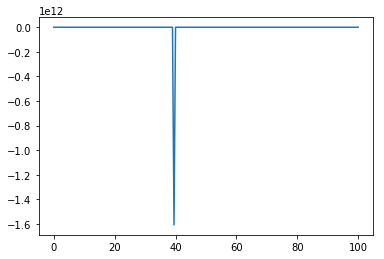

In [12]:
#pi with equality values (all of the plots are a little bit weird for this one because there are negative diff values
#and rounding error for the whitePiTwo)
# plt.plot(blackPiTwo)
# plt.plot(asianPiTwo)
plt.plot(whitePiTwo)
# plt.plot(hispanicPiTwo)

In [13]:
#value of pi for non cumulative data with mean values
whitePiTwo.mean(), blackPiTwo.mean(), asianPiTwo.mean(), hispanicPiTwo.mean()

(-8123375950.528774,
 0.32642509048604285,
 0.7913702820010068,
 0.5063311172908808)

In [14]:
#value of pi for non cumulative data with selecting score of 50
whitePiTwo[50], blackPiTwo[50], asianPiTwo[50], hispanicPiTwo[50]

(0.77551020408163152,
 0.29896907216495305,
 0.80645161290323375,
 0.54545454545453709)

In [15]:
# comparing pi values to find the best ones with a score of 50:
whitePiTwo[50], whitePi[50], blackPiTwo[50], blackPi[50], asianPiTwo[50], asianPi[50], hispanicPiTwo[50], hispanicPi[50]

(0.77551020408163152,
 0.72788697788697787,
 0.29896907216495305,
 0.31168177240684786,
 0.80645161290323375,
 0.78271983640081788,
 0.54545454545453709,
 0.53443983402489637)

In [16]:
# comparing pi values to find the best ones using the mean value
whitePiTwo.mean(), whitePi.mean(), blackPiTwo.mean(), blackPi.mean(), asianPiTwo.mean(), asianPi.mean(), hispanicPiTwo.mean(), hispanicPi.mean()

(-8123375950.528774,
 0.7331253694683577,
 0.32642509048604285,
 0.32228162064873733,
 0.7913702820010068,
 0.7778627963889763,
 0.5063311172908808,
 0.5407805362887502)

*** Interpretations.... ***
Since the mean values are not as closely linked, and there is the descrepancy in the white values, I'm going to use the transrisk score of 50 value for pi. It seems that pi is greater using the non-cumulative data rather than the cumulative data, (except for the black demographic). I'm going to use the non-cumulative data for now and see if that yeilds good results.

### Step 3) Calculate the probability using Bayes' Rule

In [17]:
piWhite = whitePiTwo[50]
piBlack = blackPiTwo[50]
piAsian = asianPiTwo[50]
piHispanic = hispanicPiTwo[50]

In [18]:
def getProbability(dataset, raceSet, goodName, badName, pi):
    good = dataset.set_index("Score")[goodName].diff().fillna(value=0)
    bad = dataset.set_index("Score")[badName].diff().fillna(value=0)
    total = raceSet.set_index("Score")["Percentage"].diff().fillna(value=0)
    finalProbability = (pi * good) / ((pi * good) + ((1 - pi)*(bad)))
    return finalProbability

In [19]:
whiteProb = getProbability(totalData, whites, "White (Good)", "White (Bad)", piWhite).fillna(value=0)
blackProb = getProbability(totalData, blacks, "Black (Good)", "Black (Bad)", piBlack).fillna(value=0)
asianProb = getProbability(totalData, blacks, "Asian (Good)", "Asian (Bad)", piAsian).fillna(value=0)
hispanicProb = getProbability(totalData, hispanics, "Hispanic (Good)", "Hispanic (Bad)", piHispanic).fillna(value=0)

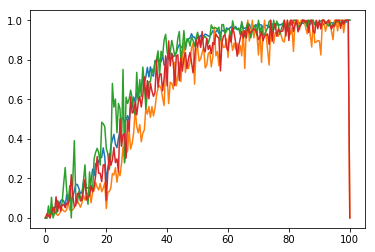

In [20]:
plt.plot(whiteProb)
plt.plot(blackProb)
plt.plot(asianProb)
plt.plot(hispanicProb)

In [21]:
newData = totalData.set_index("Score")
newData["White (Good)"] = whiteProb
newData["White (Bad)"] = 1 - whiteProb
newData["Black (Good)"] = blackProb
newData["Black (Bad)"] = 1 - blackProb
newData["Hispanic (Good)"] = hispanicProb
newData["Hispanic (Bad)"] = 1 - hispanicProb
newData["Asian (Good)"] = asianProb
newData["Asian (Bad)"] = 1 - asianProb
newData.to_csv("NonCumulativeProbabilities.csv")